### Import all the necessary libraries

In [10]:
%matplotlib inline

In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

### Load the Attributes table from your S3 bucket

In [17]:
df = pd.read_csv("/Users/fetrejo/Downloads/CA/att.csv").fillna(0)

In [18]:
df.head()

,business_partner_no,business_partner_name,business_partner_lastname,business_partner_telephone,business_partner_email,relation_start_date,business_partner_birthdate,contract_amount,first_contract_date,contracts,contracts_act,amount_act,first_contract_act_date,switch_amount,switch_dates,avg_billing,avg_kwh
0,97088774,Victoria,Smith,08081570017,dscott@hill.com,2018-06-13,1985-08-26,4,2018-07-05,"[359062, 231651, 354092, 708260]",0,0.0,0,4,"[2018-07-10, 2018-07-12, 2018-07-05, 2018-07-09]",16.621781,1.662178
1,28383761,Lynne,Davidson,(0808)1570148,cherylpatterson@stevens.info,2018-10-30,1961-11-08,2,2018-10-31,"[278722, 110765]","[278722, 110765]",2.0,2018-10-31,2,"[2018-11-28, 2018-10-31]",444.903794,44.490379
2,41924967,Duncan,French,020 7946 0377,kclark@day.com,2016-08-06,1975-07-28,2,2016-08-12,"[573979, 343006]","[573979, 343006]",2.0,2016-08-12,2,"[2016-08-23, 2016-08-12]",827.452646,82.745265
3,64735660,Charles,Harrison,+442074960205,oglover@bennett.com,2018-11-09,1963-09-20,2,2018-11-21,"[485309, 766499]","[485309, 766499]",2.0,2018-11-21,2,"[2018-12-02, 2018-11-21]",628.186196,62.818620
4,95387064,Leigh,Gardiner,+44(0)191 496 0871,reedoliver@martin.info,2015-07-12,1974-01-20,3,2015-07-29,"[395710, 145340, 809411]","[395710, 145340, 809411]",3.0,2015-07-29,3,"[2016-07-29, 2016-08-06, 2016-08-09]",2510.919786,251.091979


In [19]:
df.dtypes

business_partner_no             int64
business_partner_name          object
business_partner_lastname      object
business_partner_telephone     object
business_partner_email         object
relation_start_date            object
business_partner_birthdate     object
contract_amount                 int64
first_contract_date            object
contracts                      object
contracts_act                  object
amount_act                    float64
first_contract_act_date        object
switch_amount                   int64
switch_dates                   object
avg_billing                   float64
avg_kwh                       float64
dtype: object

# Part 1: Customer Segmentation from 2 Columns

### Load data from a slected column into each axis (2D)

In [20]:
x_axis_df = df['avg_kwh']
y_axis_df = df['avg_billing']

### Create an array based on the axes

In [21]:
T = np.array(list(zip(x_axis_df, y_axis_df)))

### Visualise the data points on a scatter plot

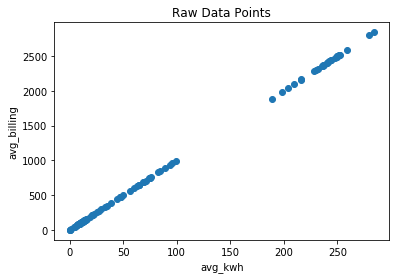

In [43]:
plt.xlabel("avg_kwh")
plt.ylabel("avg_billing")
plt.title("Raw Data Points")
plt.scatter(x_axis_df, y_axis_df)

### Generate an Elbow Curve to find the right value for "k"

Text(0.5,1,'Elbow curve')

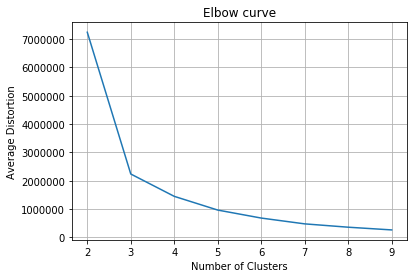

In [45]:
distorsions = []
rng = range(2, 10) #Limited to 4 since only 4 rows are used rn

for k in rng:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(T)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure()
ex = fig.add_subplot(111)
ex.plot(rng, distorsions)
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distortion")
plt.grid(True)
plt.title('Elbow curve')

### Perform K-Means clustering on the selected column data

In [46]:
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(T)
kmeans1.labels_

array([3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 0, 3, 3, 2, 3, 3, 0, 1, 3, 4, 3,
       3, 2, 0, 3, 3, 4, 2, 3, 3, 2, 3, 0, 0, 3, 3, 4, 0, 3, 3, 1, 0, 0,
       0, 2, 4, 3, 1, 2, 2, 3, 0, 3, 2, 0, 0, 3, 3, 3, 3, 0, 2, 3, 3, 3,
       0, 2, 0, 2, 2, 3, 0, 3, 1, 2, 3, 1, 1, 2, 3, 1, 3, 3, 0, 3, 3, 2,
       3, 3, 0, 4, 2, 0, 0, 0, 3, 4, 3, 3], dtype=int32)

### List the centres from the clusters

In [26]:
kmeans1.cluster_centers_

array([[ 246.10453751, 2461.04537505],
       [  41.50474782,  415.04747822],
       [  76.31573407,  763.15734066],
       [  11.27741662,  112.77416617],
       [ 205.59791503, 2055.97915026]])

### Plot your clustered data points

Text(0.5,1,'Clustered Attribute Row Data by Colours')

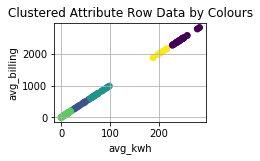

In [47]:
plt.subplot(221)
plt.xlabel("avg_kwh")
plt.ylabel("avg_billing")
plt.grid(True)
plt.scatter(T[:, 0], T[:, 1], c=kmeans1.labels_)
plt.title("Clustered Attribute Row Data by Colours")

### Visualise the centroids of the clusters

Text(0.5,1,'Clustered Attribute Data (2 Columns) with Centroids')

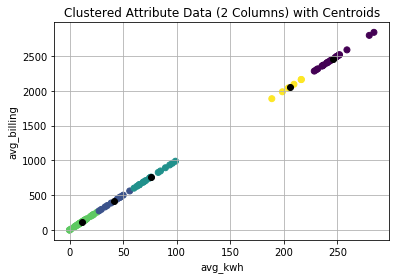

In [50]:
plt.xlabel("avg_kwh")
plt.ylabel("avg_billing")
plt.grid(True)
plt.scatter(T[:, 0], T[:, 1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0] ,kmeans1.cluster_centers_[:,1], color='black')
plt.title("Clustered Attribute Data (2 Columns) with Centroids")

# Part 2: Customer Segmentation with Numeric Columns

### Create a Pandas DataFrame from numeric columns

In [52]:
X = df.loc[:,[c for c in df.columns if (c=="business_partner_no" or c=="business_partner_no" or c=="contract_amount" or c=="amount_act" or c=="switch_amount" or c=="avg_billing" or c=="avg_kwh")]]

### Generate an Elbow Curve to find the right value for "k"

Text(0.5,1,'Elbow curve')

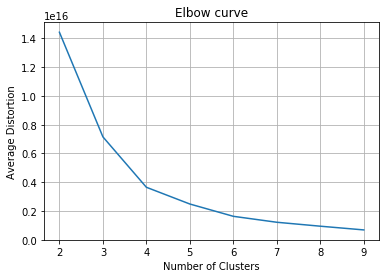

In [53]:
distorsions = []
rng = range(2,10)
for k in rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure()
ex = fig.add_subplot(111)
ex.plot(rng, distorsions)
#plt.ylim([0, 45]) - to be used when more data is loaded
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distortion")
plt.grid(True)
plt.title('Elbow curve')

### Perform K-Means clustering on the selected column data

In [54]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans.labels_

array([4, 1, 3, 0, 4, 2, 0, 4, 2, 1, 3, 2, 0, 3, 1, 2, 0, 3, 0, 3, 0, 4,
       3, 0, 3, 1, 0, 0, 2, 1, 0, 3, 1, 1, 0, 2, 1, 0, 1, 4, 3, 2, 0, 3,
       0, 2, 0, 2, 2, 4, 3, 2, 3, 3, 3, 3, 1, 4, 3, 2, 0, 2, 1, 3, 1, 2,
       3, 4, 3, 2, 4, 3, 0, 1, 4, 3, 0, 2, 2, 2, 2, 4, 1, 4, 4, 3, 3, 3,
       2, 4, 2, 0, 0, 1, 1, 2, 2, 1, 4, 1], dtype=int32)

### List the centres from the clusters

In [55]:
kmeans.cluster_centers_

array([[6.44454652e+07, 2.95000000e+00, 1.95000000e+00, 2.95000000e+00,
        1.16414056e+03, 1.16414056e+02],
       [2.29562048e+07, 3.00000000e+00, 1.66666667e+00, 3.00000000e+00,
        9.60419462e+02, 9.60419462e+01],
       [8.03182966e+07, 2.91304348e+00, 1.52173913e+00, 2.91304348e+00,
        7.73068512e+02, 7.73068512e+01],
       [4.42775820e+07, 3.04166667e+00, 1.54166667e+00, 3.04166667e+00,
        1.00435775e+03, 1.00435775e+02],
       [9.36179017e+07, 2.93333333e+00, 1.33333333e+00, 2.93333333e+00,
        6.34884305e+02, 6.34884305e+01]])

### Perform linear dimensionality reduction using Principal Component Analysis (PCA)

In [56]:
X_prime = decomposition.PCA(n_components=2).fit_transform(X)

### Revise PCA array dimensions as a tuple (rows, columns)

In [57]:
np.shape(X_prime)

(100, 2)

### Review the PCA 2-dimensional array

In [58]:
print(X_prime)

[[-3.69250510e+07 -7.27490174e+02]
 [ 3.17799620e+07 -6.32327299e+02]
 [ 1.82387560e+07 -1.81794087e+02]
 [-4.57193695e+06 -2.70745663e+02]
 [-3.52233409e+07  1.77094653e+03]
 [-1.47404220e+07 -7.84815985e+02]
 [-4.64016295e+06 -5.68596813e+02]
 [-2.90668640e+07 -2.18456018e+02]
 [-1.30678139e+07  1.51561487e+03]
 [ 3.77054920e+07 -6.37147813e+02]
 [ 1.82088320e+07 -7.99881788e+02]
 [-2.35589789e+07  1.50384849e+03]
 [ 2.09819105e+06 -8.24016348e+02]
 [ 2.33894460e+07 -7.81568752e+02]
 [ 3.02124600e+07 -3.07016959e+02]
 [-1.67833760e+07 -6.28362034e+02]
 [-1.03446610e+07 -7.38313424e+02]
 [ 2.22907421e+07  1.47067522e+03]
 [-4.55836395e+06 -3.98945564e+02]
 [ 6.51734105e+06 -8.83021992e+02]
 [-7.26315594e+06  1.10747269e+03]
 [-3.40800520e+07 -7.58077498e+02]
 [ 1.50947780e+07 -8.99532226e+02]
 [-7.54969395e+06 -3.47595645e+01]
 [ 2.56140081e+07  1.55237613e+03]
 [ 3.55950150e+07 -1.01410771e+03]
 [-1.04341295e+06 -8.38785059e+02]
 [-1.11310309e+07  1.30246638e+03]
 [-2.60534920e+07 -1

### Plot your clustered data points

Text(0.5,1,'Clustered Attribute Row Data by Colours')

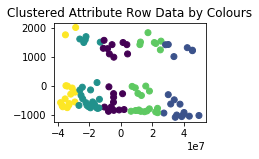

In [62]:
plt.subplot(221)
plt.scatter(X_prime[:, 0], X_prime[:, 1], c=kmeans.labels_)
plt.title("Clustered Attribute Row Data by Colours")

### Visualise the centroids of the clusters

Text(0.5,1,'Clustered Attribute Row Data with Centroids')

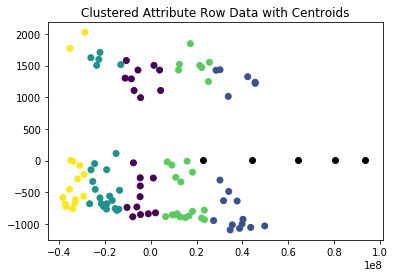

In [64]:
plt.scatter(X_prime[:, 0], X_prime[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Clustered Attribute Row Data with Centroids")

# Part 3: Cluster Prediction for New Client

### Create an array based on the new row from the Attributes table:

In [65]:
array = np.array([[64803886,2,2,2,331.48178895095634,33.14817889509563], [64803886,2,2,2,331.48178895095634,33.14817889509563]])

### Predict the client's cluster based on the trained k-means algorithm:

In [66]:
kmeans.predict(array)

array([0, 0], dtype=int32)